<a href="https://colab.research.google.com/github/rayshu/Data-Classification/blob/master/Classifiers_RF_SVM_NB_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# import packages

In [0]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.feature_selection import chi2
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

In [0]:
df = pd.read_csv("/content/drive/My Drive/Data/cleaneddata.csv")
np.random.seed(1000)

In [95]:
df_ent = df.loc[(df['DocType']=="Public") | (df["DocType"]=="Private"),:]
df_ent.loc[:,'DocType_id'] = df_ent['DocType'].map({"Public":0, "Private":1})
df_ent

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Text,DocType,DocType_id
0,confirm usf mnd significant action mnc mnd eve...,Private,1
1,joint defense operation center receive report ...,Private,1
2,c small arm fire attack contractor set convoy ...,Private,1
3,c small arm fire attack contractor set convoy ...,Private,1
4,personal security detail travel north along ma...,Private,1
...,...,...,...
480,fifth year run dyncorp international llc di re...,Public,0
481,dyncorp international di gain important govern...,Public,0
482,january dyncorp international di one first com...,Public,0
483,november g job magazine ranked dyncorp interna...,Public,0


In [96]:
df_nent = df.loc[df["DocType"]=="NE",:]
df_nent.loc[:,'DocType_id'] = df_nent['DocType'].map({"NE":0})
df_nent

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Text,DocType,DocType_id
485,idaho vandal idaho vandal intercollegiate athl...,NE,0
486,robert l may robert lewis may july august crea...,NE,0
487,indycar series izod indycar series premier lev...,NE,0
488,philippine nationality law philippine national...,NE,0
489,takeichi nishi colonel baron imperial japanese...,NE,0
...,...,...,...
10487,dice los angeles dice los angeles formerly kno...,NE,0
10488,spirit radio spirit radio song release canadia...,NE,0
10489,gm degree v engine general motor opel subsidia...,NE,0
10490,muzaffarabad muzaffarabad pahari potwari capit...,NE,0


## data distribution

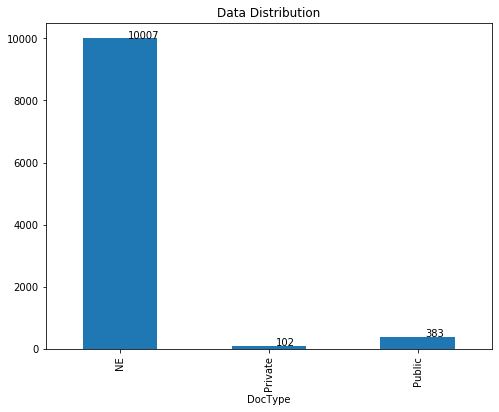

In [90]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
graph = df.groupby('DocType').Text.count().plot.bar(ylim=0)

for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()))
graph.set_title('Data Distribution') 
plt.show()

# Training Data

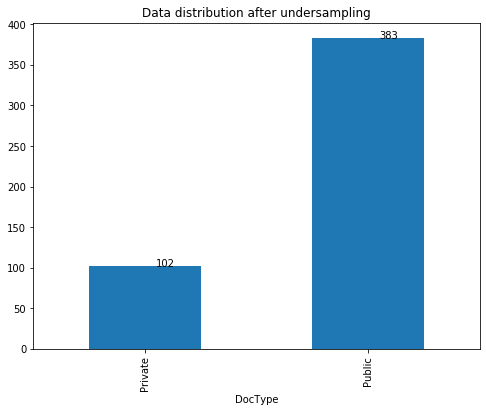

In [91]:
fig = plt.figure(figsize=(8,6))
graph = df_ent.groupby('DocType').Text.count().plot.bar(ylim=0)

for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()))
graph.set_title('Data distribution after undersampling') 
plt.show()

In [0]:
doctype_to_id = {'DocType':["Public", "Private"], 'doctype_id': [0, 1]} 
doctype_id_df = pd.DataFrame(doctype_to_id) 

## Train Test Split

In [235]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df_ent['Text'],df_ent['DocType_id'],test_size=0.2)
print('Train_X: ', Train_X.shape[0])
print('Train_Y: ', Train_Y.shape[0])
print('Test_X :  ', Test_X.shape[0])
print('Test_Y :  ', Test_Y.shape[0])

Train_X:  388
Train_Y:  388
Test_X :   97
Test_Y :   97


In [236]:
Train_counts = pd.DataFrame(Train_Y.values, columns = list('a'))
print('Train Data Distribution')
print(Train_counts['a'].value_counts())

Test_counts = pd.DataFrame(Test_Y.values, columns = list('a'))
print('Test Data Distribution')
print(Test_counts['a'].value_counts())

Train Data Distribution
0    306
1     82
Name: a, dtype: int64
Test Data Distribution
0    77
1    20
Name: a, dtype: int64


## tf-idf Vectors

In [237]:
# Tfidf_vect  = TfidfVectorizer(ngram_range=(1,2))
# Tfidf_vect = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='ISO-8859-1', ngram_range=(1, 2))
Tfidf_vect = TfidfVectorizer(ngram_range=(1,2))
#Learn the vocabulary
Tfidf_vect.fit(df_ent['Text'])

Train_X_Tfidf = Tfidf_vect.transform(Train_X)
print("Train Data (Text, Features):", Train_X_Tfidf.shape)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)
print("Test Data (Text, Features):", Test_X_Tfidf.shape)

Test_X_Tfidf_Nent = Tfidf_vect.transform(df_nent['Text'])
print("Wikipedia Data (Text, Features):", Test_X_Tfidf_Nent.shape)
Test_Y_Nent = df_nent['DocType_id']

Train Data (Text, Features): (388, 63918)
Test Data (Text, Features): (97, 63918)
Wikipedia Data (Text, Features): (10007, 63918)


In [239]:
clf = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto',random_state=0)
clf.fit(Train_X_Tfidf,Train_Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

## Top 10 features

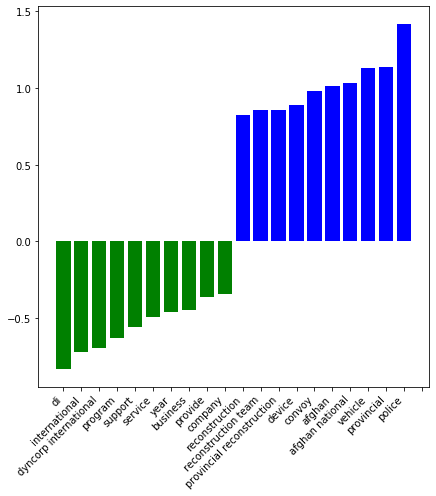

In [240]:
N = 10
def feature_plot(classifier, feature_names, top_features=N):
 coef = classifier.coef_.toarray()[0]
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 plt.figure(figsize=(7, 7))
 colors = ['green' if c < 0 else 'blue' for c in coef[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
 feature_names = np.array(feature_names)
 plt.xticks(np.arange(1 + 2 * top_features), feature_names[top_coefficients], rotation=45, ha='right')
 plt.show()

#  print("Most corelated terms: \n. {}".format('\n'.join(feature_names[top_coefficients])))
#  unigrams = [v for v in feature_names[top_coefficients] if len(v.split(' ')) == 1]
#  bigrams = [v for v in feature_names[top_coefficients] if len(v.split(' ')) == 2]
#  print("Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[:N])))
#  print("Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

feature_plot(clf, Tfidf_vect.get_feature_names())


# Model Selection

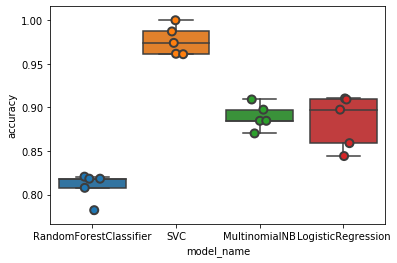

In [241]:
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    # LinearSVC(),
    svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto',random_state=0),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, Train_X_Tfidf, Train_Y, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [242]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LogisticRegression        0.883983
MultinomialNB             0.889177
RandomForestClassifier    0.809324
SVC                       0.976757
Name: accuracy, dtype: float64

## Model Evaluation

RandomForestClassifier 
 [[77  0]
 [19  1]]
SVC 
 [[77  0]
 [ 2 18]]
MultinomialNB 
 [[77  0]
 [ 7 13]]
LogisticRegression 
 [[77  0]
 [ 9 11]]


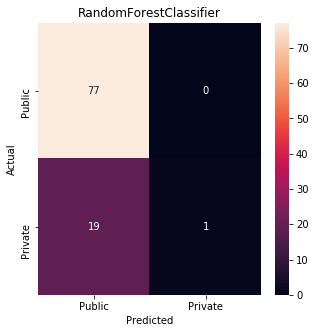

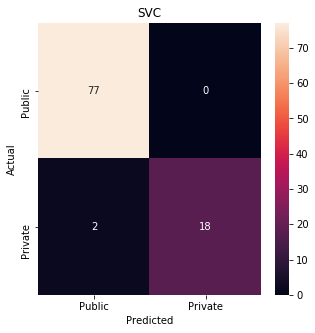

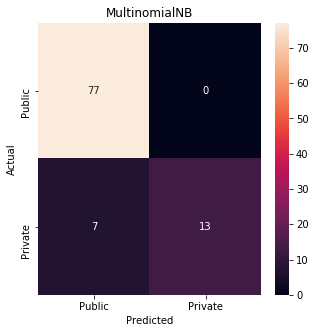

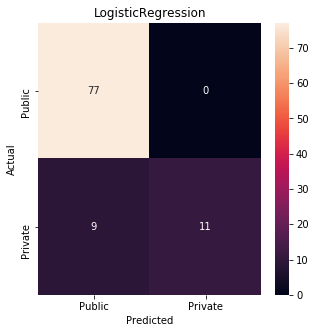

In [243]:
precision_public_list = []
precision_private_list = []
recall_public_list = []
recall_private_list = []
f1_public_list = []
f1_private_list = []

for model in models:   
    model_name = model.__class__.__name__
    model.fit(Train_X_Tfidf,Train_Y)
    predictions = model.predict(Test_X_Tfidf)
    conf_mat = confusion_matrix(Test_Y, predictions)
    
    print(model_name, '\n', conf_mat)
    fig, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=doctype_id_df.DocType.values, yticklabels=doctype_id_df.DocType.values)
    plt.title(model_name)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    # fig.savefig('/content/drive/My Drive/Data/' + model_name + '.png')
    True_private = conf_mat[0,0]
    False_private = conf_mat[0,1]
    False_public = conf_mat[1,0]
    True_public = conf_mat[1,1]

    precision_private = round((True_private) / (True_private + False_private), 2)
    recall_private = round((True_private) / (True_private + False_public), 2)
    f1_private = round((2 * precision_private * recall_private) / (precision_private + recall_private), 2)

    precision_public = round((True_public) / (True_public + False_public), 2)
    recall_public = round((True_public) / (True_public + False_private), 2)
    f1_public = round((2 * precision_public * recall_public)/(precision_public + recall_public), 2)


    #writing to list
    precision_private_list.append(precision_private)
    recall_private_list.append(recall_private)
    f1_private_list.append(f1_private)

    precision_public_list.append(precision_public)
    recall_public_list.append(recall_public)
    f1_public_list.append(f1_public)

In [244]:
dict = {'Model':["Random Forest", "Linear Support Vector Classifier", "Multinomial Naive Bayes", "Logistic Regression"], 
        'Precision (Public Class)': precision_public_list, 
        'Recall (Public Class)': recall_public_list,
        'F1 Score (Public Class)': f1_public_list,
        'Precision (Private Class)': precision_private_list,
        'Recall (Private Class)': recall_private_list,
        'F1 Score (Private Class)': f1_private_list
        } 
    
evaluation_df = pd.DataFrame(dict) 
evaluation_df

,Model,Precision (Public Class),Recall (Public Class),F1 Score (Public Class),Precision (Private Class),Recall (Private Class),F1 Score (Private Class)
0,Random Forest,0.05,1.0,0.10,1.0,0.80,0.89
1,Linear Support Vector Classifier,0.90,1.0,0.95,1.0,0.97,0.98
2,Multinomial Naive Bayes,0.65,1.0,0.79,1.0,0.92,0.96
3,Logistic Regression,0.55,1.0,0.71,1.0,0.90,0.95


# Validation on wikipedia data


 RandomForestClassifier Accuracy Score: NE Data ->  99.75017487758569
RandomForestClassifier 
 [[10007]]

 SVC Accuracy Score: NE Data ->  99.75017487758569
SVC 
 [[9993   14]
 [   0    0]]

 MultinomialNB Accuracy Score: NE Data ->  99.75017487758569
MultinomialNB 
 [[10007]]

 LogisticRegression Accuracy Score: NE Data ->  99.75017487758569
LogisticRegression 
 [[10007]]


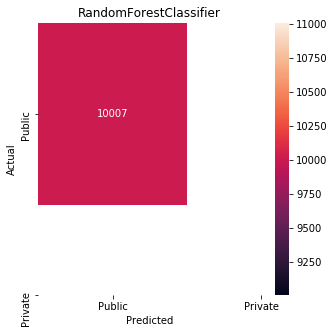

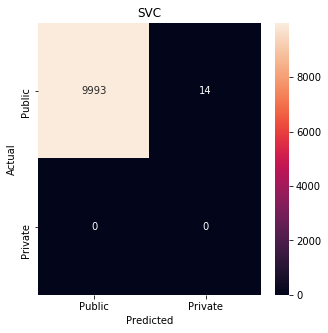

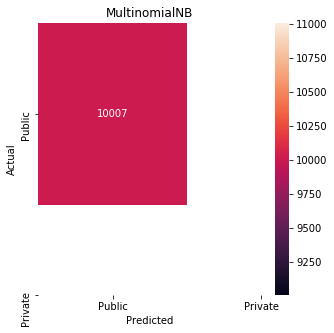

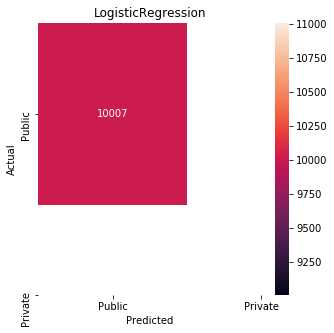

In [245]:
for model in models:
    model_name = model.__class__.__name__
    model.fit(Train_X_Tfidf,Train_Y)
    predictions2 = model.predict(Test_X_Tfidf_Nent)
    conf_mat = confusion_matrix(Test_Y_Nent,predictions2)
    print("\n",model_name,"Accuracy Score: NE Data -> ",accuracy_score(predictions_SVM, Test_Y_Nent)*100)
    print(model_name, '\n', conf_mat)
    fig, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=doctype_id_df.DocType.values, yticklabels=doctype_id_df.DocType.values)
    plt.title(model_name)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')



# Random Forest

In [0]:
RF = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0)
RF.fit(Train_X_Tfidf,Train_Y)
predictions_RF = RF.predict(Test_X_Tfidf_Nent)


### Correctly classified data

In [247]:
print(df_nent[predictions_RF==0]['Text'])
print('Total data count:', len(df_nent[predictions_RF==0]['Text']))

485      idaho vandal idaho vandal intercollegiate athl...
486      robert l may robert lewis may july august crea...
487      indycar series izod indycar series premier lev...
488      philippine nationality law philippine national...
489      takeichi nishi colonel baron imperial japanese...
                               ...                        
10487    dice los angeles dice los angeles formerly kno...
10488    spirit radio spirit radio song release canadia...
10489    gm degree v engine general motor opel subsidia...
10490    muzaffarabad muzaffarabad pahari potwari capit...
10491    fender jag stang fender jag stang electric gui...
Name: Text, Length: 10007, dtype: object
Total data count: 10007


### Misclassified data

In [248]:
print(df_nent[predictions_RF==1]['Text'])
print('Total data count:', len(df_nent[predictions_RF==1]['Text']))

Series([], Name: Text, dtype: object)
Total data count: 0


# SVM

In [0]:
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto',random_state=0)
SVM.fit(Train_X_Tfidf,Train_Y)
predictions_SVM = SVM.predict(Test_X_Tfidf_Nent)

### Correctly classified data

In [249]:
print(df_nent[predictions_SVM==0]['Text'])
print('Total data count:', len(df_nent[predictions_SVM==0]['Text']))


485      idaho vandal idaho vandal intercollegiate athl...
486      robert l may robert lewis may july august crea...
487      indycar series izod indycar series premier lev...
488      philippine nationality law philippine national...
489      takeichi nishi colonel baron imperial japanese...
                               ...                        
10487    dice los angeles dice los angeles formerly kno...
10488    spirit radio spirit radio song release canadia...
10489    gm degree v engine general motor opel subsidia...
10490    muzaffarabad muzaffarabad pahari potwari capit...
10491    fender jag stang fender jag stang electric gui...
Name: Text, Length: 9982, dtype: object
Total data count: 9982


### misclassified data

In [250]:
print(df_nent[predictions_SVM==1]['Text'])
print('Total data count:', len(df_nent[predictions_SVM==1]['Text']))

806      brake test brake test term use motorsport driv...
952      warren v district columbia warren v district c...
1358     guanethidine guanethidine antihypertensive dru...
1745     line action physic line action force f express...
1940     corpus amylacea corpus amylacea also know pros...
2229     woo bum kon woo bum kon wou bom kon february a...
2314     police commissioner kolkata commissioner polic...
2445     dead breakfast dead breakfast musical horror c...
2540     mountain reedbuck mountain reedbuck redunca fu...
3491     cm kwk cm kwk l cm kampfwagenkanone l german c...
3686     ursula sabina eriksson ursula sabina eriksson ...
3740     china national highway traffic jam china natio...
4482     patrick dorismond patrick moses dorismond febr...
4989     terrorist attack kenya since kenya see upsurge...
5628     corner force corner force side force lateral e...
5856     red route notoc term red route separately adop...
6463     snap cap snap cap device appear similar standa.

# Naive Bayes

In [0]:
NB = MultinomialNB()
NB.fit(Train_X_Tfidf,Train_Y)
predictions_NB = NB.predict(Test_X_Tfidf_Nent)

### Correctly classified data

In [252]:
print(df_nent[predictions_NB==0]['Text'])
print('Total data count:', len(df_nent[predictions_NB==0]['Text']))

485      idaho vandal idaho vandal intercollegiate athl...
486      robert l may robert lewis may july august crea...
487      indycar series izod indycar series premier lev...
488      philippine nationality law philippine national...
489      takeichi nishi colonel baron imperial japanese...
                               ...                        
10487    dice los angeles dice los angeles formerly kno...
10488    spirit radio spirit radio song release canadia...
10489    gm degree v engine general motor opel subsidia...
10490    muzaffarabad muzaffarabad pahari potwari capit...
10491    fender jag stang fender jag stang electric gui...
Name: Text, Length: 10007, dtype: object
Total data count: 10007


### Misclassified data

In [253]:
print(df_nent[predictions_NB==1]['Text'])
print('Total data count:', len(df_nent[predictions_NB==1]['Text']))

Series([], Name: Text, dtype: object)
Total data count: 0


# Logistic Regression

In [0]:
LR = LogisticRegression(random_state=0)
LR.fit(Train_X_Tfidf,Train_Y)
predictions_LR = LR.predict(Test_X_Tfidf_Nent)

### Correctly classified data

In [255]:
print(df_nent[predictions_LR==0]['Text'])
print('Total data count:', len(df_nent[predictions_LR==0]['Text']))

485      idaho vandal idaho vandal intercollegiate athl...
486      robert l may robert lewis may july august crea...
487      indycar series izod indycar series premier lev...
488      philippine nationality law philippine national...
489      takeichi nishi colonel baron imperial japanese...
                               ...                        
10487    dice los angeles dice los angeles formerly kno...
10488    spirit radio spirit radio song release canadia...
10489    gm degree v engine general motor opel subsidia...
10490    muzaffarabad muzaffarabad pahari potwari capit...
10491    fender jag stang fender jag stang electric gui...
Name: Text, Length: 10007, dtype: object
Total data count: 10007


### Misclassified data

In [256]:
print(df_nent[predictions_LR==1]['Text'])
print('Total data count:', len(df_nent[predictions_LR==1]['Text']))

Series([], Name: Text, dtype: object)
Total data count: 0
